# Member 1 : Muhammad Muneer (i220526)
# Member 2: Shahzaib Ali (22i0576)
# Member 3: Hamza Mehmood (19i-0458)

**Parallel Distributed Computing Semester Project. In this we have implemented mutiple models to improve accuracy metrices like f1, precision and recall. all the things in start were done in cpu serially later on we applied mutiple comparasion with cpu vs gpu and parallel vs serial executions inside this notebook**

In [34]:
import pandas as pd
df = pd.read_csv('/kaggle/input/pdc-dataset-with-target/pdc_dataset_with_target.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.75,55.0,B,875.98,No,8,44.16,0
1,31.33,39.0,C,839.91,No,4,13.93,1
2,23.87,10.0,A,1364.70,Yes,4,15.16,0
3,35.64,34.0,C,1462.07,No,4,15.71,1
4,NaN,NaN,C,710.61,No,8,13.77,1


## Filling missing values of dataset with mean values of data set

In [35]:
import numpy as np


# Display missing values before imputation
print("Missing values before imputation:")
print(df[['feature_1', 'feature_2', 'feature_4', 'feature_7']].isnull().sum())

# Calculate means for each column
mean_feature_1 = df['feature_1'].mean()
mean_feature_2 = df['feature_2'].mean()
mean_feature_4 = df['feature_4'].mean()
mean_feature_7 = df['feature_7'].mean()

# Fill missing values with column means
df['feature_1'].fillna(mean_feature_1, inplace=True)
df['feature_2'].fillna(mean_feature_2, inplace=True)
df['feature_4'].fillna(mean_feature_4, inplace=True)
df['feature_7'].fillna(mean_feature_7, inplace=True)

# Display missing values after imputation
print("\nMissing values after imputation:")
print(df[['feature_1', 'feature_2', 'feature_4', 'feature_7']].isnull().sum())

# Display the updated dataframe
print("\nUpdated DataFrame:")
df.head(11)  # Showing first 11 rows as your sample had 11 rows

Missing values before imputation:
feature_1    2054
feature_2    2050
feature_4    2054
feature_7    2036
dtype: int64

Missing values after imputation:
feature_1    0
feature_2    0
feature_4    0
feature_7    0
dtype: int64

Updated DataFrame:


/tmp/ipykernel_31/704296577.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['feature_1'].fillna(mean_feature_1, inplace=True)
/tmp/ipykernel_31/704296577.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try 

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.750000,55.00000,B,875.98,No,8,44.160000,0
1,31.330000,39.00000,C,839.91,No,4,13.930000,1
2,23.870000,10.00000,A,1364.70,Yes,4,15.160000,0
3,35.640000,34.00000,C,1462.07,No,4,15.710000,1
4,29.990843,49.43656,C,710.61,No,8,13.770000,1
5,28.000000,99.00000,B,855.72,Yes,3,23.145819,0
6,28.460000,29.00000,C,853.70,No,5,22.650000,0
7,29.210000,59.00000,C,1122.96,No,6,4.750000,0
8,34.030000,18.00000,C,1289.26,Yes,2,24.100000,0
9,42.650000,47.00000,A,1600.50,No,7,2.070000,1


In [36]:
df.head(11)

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,target
0,27.750000,55.00000,B,875.98,No,8,44.160000,0
1,31.330000,39.00000,C,839.91,No,4,13.930000,1
2,23.870000,10.00000,A,1364.70,Yes,4,15.160000,0
3,35.640000,34.00000,C,1462.07,No,4,15.710000,1
4,29.990843,49.43656,C,710.61,No,8,13.770000,1
5,28.000000,99.00000,B,855.72,Yes,3,23.145819,0
6,28.460000,29.00000,C,853.70,No,5,22.650000,0
7,29.210000,59.00000,C,1122.96,No,6,4.750000,0
8,34.030000,18.00000,C,1289.26,Yes,2,24.100000,0
9,42.650000,47.00000,A,1600.50,No,7,2.070000,1


## Detecting and removing Outliers

In [37]:
def treat_outliers(df):
    num_cols = ['feature_1', 'feature_2', 'feature_4', 'feature_7']

    # Winsorize at 5th and 95th percentiles
    for col in num_cols:
        lower = np.percentile(df[col].dropna(), 5)
        upper = np.percentile(df[col].dropna(), 95)
        df[col] = np.where(df[col] < lower, lower, df[col])
        df[col] = np.where(df[col] > upper, upper, df[col])

    return df

# Apply to your dataframe
df_clean = treat_outliers(df.copy())
num_cols = ['feature_1', 'feature_2', 'feature_4', 'feature_7']
# Verify
print("Original data range:")
print(df[num_cols].agg(['min', 'max']))
print("\nTreated data range:")
print(df_clean[num_cols].agg(['min', 'max']))

Original data range:
     feature_1  feature_2  feature_4  feature_7
min       7.67        0.0    -155.62        0.0
max      52.40       99.0   17643.40     1660.8

Treated data range:
     feature_1  feature_2  feature_4  feature_7
min      21.98        5.0   516.3685     1.0900
max      38.07       94.0  1515.3545    62.3805


In [38]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# One-Hot Encoding implementation
encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop first to avoid dummy trap
encoded_features = encoder.fit_transform(df_clean[['feature_3', 'feature_5']])

# Create new column names
new_columns = []
for col, categories in zip(['feature_3', 'feature_5'], encoder.categories_):
    new_columns.extend([f"{col}_{cat}" for cat in categories[1:]])

# Create DataFrame with encoded features
encoded_df = pd.DataFrame(encoded_features, columns=new_columns)

# Concatenate with original dataframe
df_encoded = pd.concat([df.drop(['feature_3', 'feature_5'], axis=1), encoded_df], axis=1)

In [39]:
df_encoded.head(10)

,feature_1,feature_2,feature_4,feature_6,feature_7,target,feature_3_B,feature_3_C,feature_5_Yes
0,27.750000,55.00000,875.98,8,44.160000,0,1.0,0.0,0.0
1,31.330000,39.00000,839.91,4,13.930000,1,0.0,1.0,0.0
2,23.870000,10.00000,1364.70,4,15.160000,0,0.0,0.0,1.0
3,35.640000,34.00000,1462.07,4,15.710000,1,0.0,1.0,0.0
4,29.990843,49.43656,710.61,8,13.770000,1,0.0,1.0,0.0
5,28.000000,99.00000,855.72,3,23.145819,0,1.0,0.0,1.0
6,28.460000,29.00000,853.70,5,22.650000,0,0.0,1.0,0.0
7,29.210000,59.00000,1122.96,6,4.750000,0,0.0,1.0,0.0
8,34.030000,18.00000,1289.26,2,24.100000,0,0.0,1.0,1.0
9,42.650000,47.00000,1600.50,7,2.070000,1,0.0,0.0,0.0


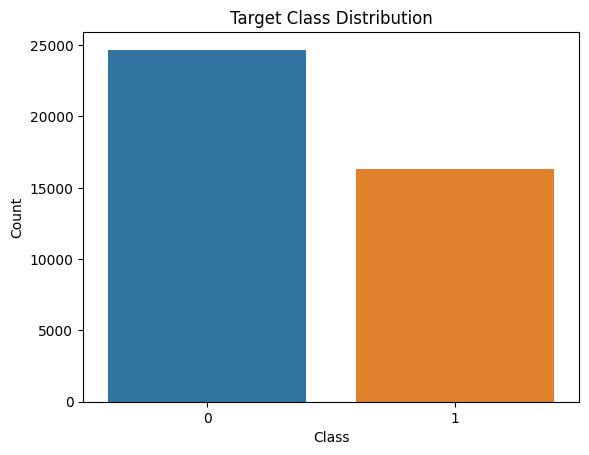

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot class distribution
sns.countplot(x='target', data=df)
plt.title('Target Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


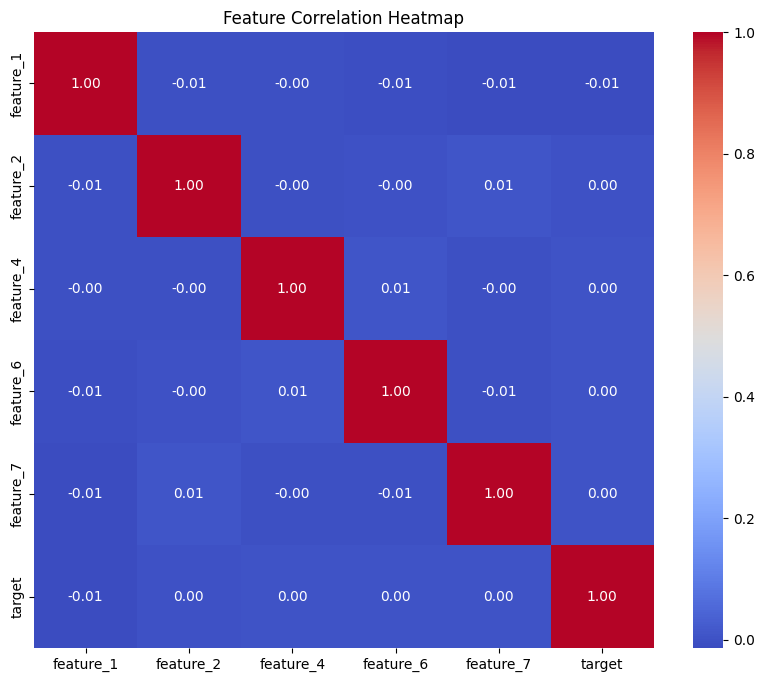

In [10]:
df_corr = df_encoded.drop(columns=['feature_3_B', 'feature_3_C', 'feature_5_Yes'])

plt.figure(figsize=(10, 8))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


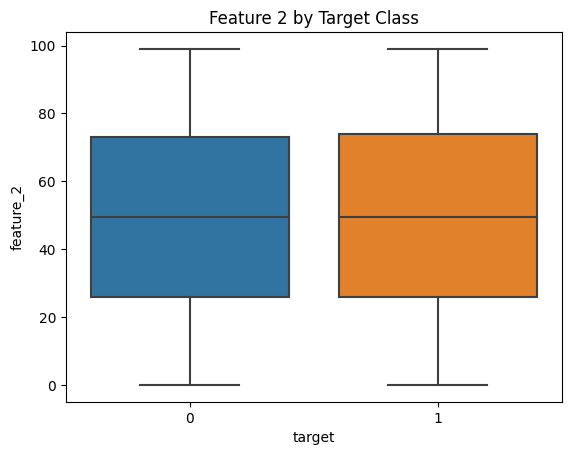

In [103]:
sns.boxplot(x='target', y='feature_2', data=df)
plt.title('Feature 2 by Target Class')
plt.show()


/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to 

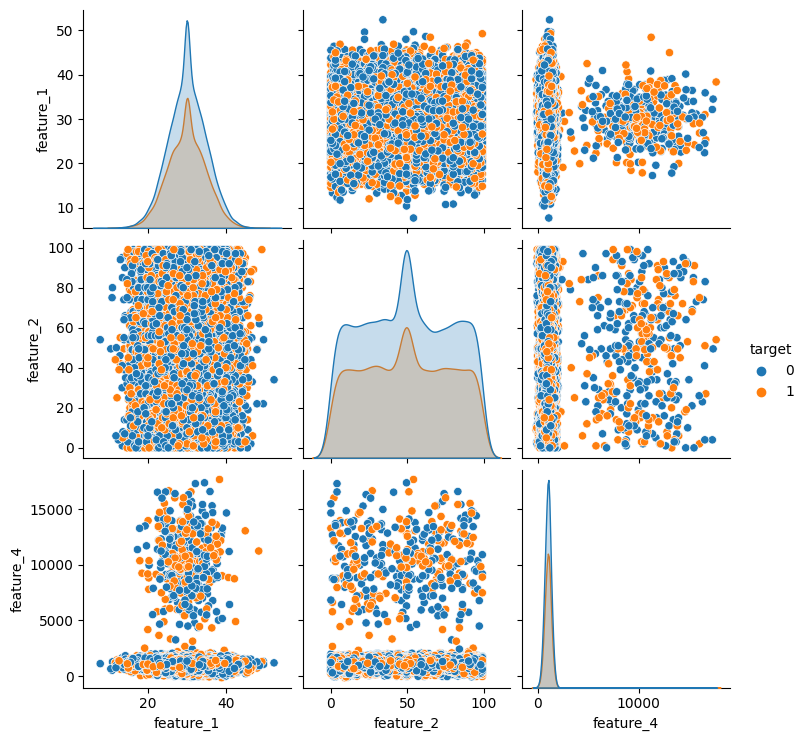

In [12]:
sns.pairplot(df, hue='target', vars=['feature_1', 'feature_2', 'feature_4'])
plt.show()


## Splitting Dataset in Train Test format

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# Separate features and target
X = df_encoded.drop('target', axis=1)
y = df_encoded['target']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale numerical features (if not already done in preprocessing)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Handling class imbalance

In [105]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", pd.Series(y_train_bal).value_counts())


# Testing Different Models and choosing best one for Parallelization

In [83]:
import time
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder  # Optional, if needed

# Timing each model
start_dt = time.time()
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_time = time.time() - start_dt
y_pred_dt = dt_model.predict(X_test)

start_rf = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_time = time.time() - start_rf
y_pred_rf = rf.predict(X_test)

start_xgb = time.time()
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)
xgb_time = time.time() - start_xgb
y_pred_xgb = xgb.predict(X_test)

# Scores
results = {
    "Model": ["Decision Tree", "Random Forest", "XGBoost"],
    "Accuracy": [
        accuracy_score(y_test, y_pred_dt),
        accuracy_score(y_test, y_pred_rf),
        accuracy_score(y_test, y_pred_xgb)
    ],
    "F1 Score": [
        f1_score(y_test, y_pred_dt),
        f1_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_xgb)
    ],
    "Training Time (s)": [dt_time, rf_time, xgb_time],
    "Confusion Matrix": [
        confusion_matrix(y_test, y_pred_dt),
        confusion_matrix(y_test, y_pred_rf),
        confusion_matrix(y_test, y_pred_xgb)
    ]
}


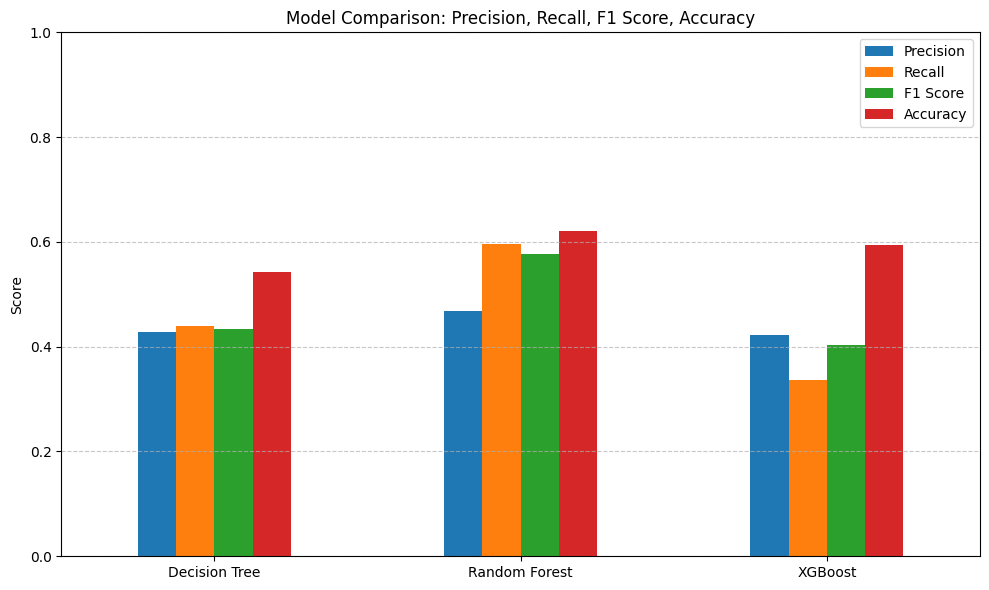

In [95]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

# Compute metrics
dt_metrics = {
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1 Score': f1_score(y_test, y_pred_dt),
    'Accuracy': accuracy_score(y_test, y_pred_dt)
}

rf_metrics = {
    'Precision': precision_score(y_test, y_pred_rf) ,
    'Recall': recall_score(y_test, y_pred_rf),
    'F1 Score': f1_score(y_test, y_pred_rf) ,
    'Accuracy': accuracy_score(y_test, y_pred_rf) 
}

xgb_metrics = {
    'Precision': precision_score(y_test, y_pred_xgb),
    'Recall': recall_score(y_test, y_pred_xgb),
    'F1 Score': f1_score(y_test, y_pred_xgb),
    'Accuracy': accuracy_score(y_test, y_pred_xgb)
}

# Combine into a DataFrame
metrics_df = pd.DataFrame([dt_metrics, rf_metrics, xgb_metrics],
                          index=['Decision Tree', 'Random Forest', 'XGBoost'])

# Plot
metrics_df.plot(kind='bar', figsize=(10, 6))
plt.title('Model Comparison: Precision, Recall, F1 Score, Accuracy')
plt.ylabel('Score')
plt.ylim(0, 1)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


## Cpu and Gpu implementation Random Forest
#### As Random Forest Was giving best result so that's why we have chosen Random Forest

In [41]:
# !pip install cudf-cu11 rmm-cu11 cuml-cu11 cupy-cuda11x

# !wget -nc https://raw.githubusercontent.com/rapidsai/notebooks-contrib/main/utils/rapids-colab.sh
# !bash rapids-colab.sh.

In [14]:
import numpy as np
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier
# from cuml.ensemble import DecisionTreeClassifier as cuDecisionTreeClassifier
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
import time

## CPU Implementation

In [15]:


def cpu_random_forest_tuning(X_train, y_train, n_iter=10):
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, 30, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    start_time = time.time()
    rf = RandomForestClassifier(random_state=42)
    rand_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist,
                                     n_iter=n_iter, cv=3, n_jobs=-1, verbose=1,
                                     random_state=42)
    rand_search.fit(X_train, y_train)
    end_time = time.time()

    print(f"Best parameters: {rand_search.best_params_}")
    print(f"Best score: {rand_search.best_score_:.4f}")
    print(f"Training time: {end_time - start_time:.2f} seconds")

    return rand_search.best_estimator_, end_time - start_time



## GPU Implementation

In [16]:
def gpu_random_forest_tuning(X_train, y_train):
    param_grid = {
        'n_estimators': [100, 200],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2]
    }

    X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
    y_train_np = y_train.values if hasattr(y_train, 'values') else y_train

    best_score = 0
    best_params = {}
    best_model = None

    start_time = time.time()

    for n_est in param_grid['n_estimators']:
        for depth in param_grid['max_depth']:
            for min_split in param_grid['min_samples_split']:
                for min_leaf in param_grid['min_samples_leaf']:
                    model = cuRandomForestClassifier(
                        n_estimators=n_est,
                        max_depth=depth,
                        min_samples_split=min_split,
                        min_samples_leaf=min_leaf,
                        random_state=42
                    )
                    split = int(0.8 * len(X_train_np))
                    model.fit(X_train_np[:split], y_train_np[:split])
                    preds = model.predict(X_train_np[split:])
                    score = accuracy_score(y_train_np[split:], preds)

                    if score > best_score:
                        best_score = score
                        best_params = {
                            'n_estimators': n_est,
                            'max_depth': depth,
                            'min_samples_split': min_split,
                            'min_samples_leaf': min_leaf
                        }
                        best_model = model

    end_time = time.time()
    print(f"Best parameters: {best_params}")
    print(f"Best score: {best_score:.4f}")
    print(f"Training time: {end_time - start_time:.2f} seconds")

    return best_model, end_time - start_time


In [17]:
# CPU Random Forest
print("=== CPU Random Forest ===")
cpu_rf_model, cpu_rf_time = cpu_random_forest_tuning(X_train, y_train)





=== CPU Random Forest ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters: {'n_estimators': 100, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'sqrt', 'max_depth': 10}
Best score: 0.6022
Training time: 76.32 seconds


In [18]:
# GPU Random Forest
print("\n=== GPU Random Forest ===")
gpu_rf_model, gpu_rf_time = gpu_random_forest_tuning(X_train, y_train)


=== GPU Random Forest ===


/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:368: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:368: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recommended. If n_streams is > 1, results may vary due to stream/thread timing differences, even when random_state is set
  return init_func(self, *args, **kwargs)
/usr/local/lib/python3.11/dist-packages/cuml/internals/api_decorators.py:368: UserWarning: For reproducible results in Random Forest Classifier or for almost reproducible results in Random Forest Regressor, n_streams=1 is recomm

Best parameters: {'n_estimators': 100, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 2}
Best score: 0.6009
Training time: 8.88 seconds


In [21]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
import time

def evaluate_model(model, X_test, y_test, is_gpu=False):
    start_time = time.time()

    if is_gpu:
        X_test_np = X_test.values if hasattr(X_test, 'values') else X_test
        y_test_np = y_test.values if hasattr(y_test, 'values') else y_test
        preds = model.predict(X_test_np)
    else:
        preds = model.predict(X_test)

    end_time = time.time()

    acc = accuracy_score(y_test, preds)
    f1 = f1_score(y_test, preds)
    inference_time = end_time - start_time

    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score (for Class 1): {f1:.4f}")
    print(f"Inference Time: {inference_time:.4f} seconds\n")

    print("=== Classification Report ===")
    print(classification_report(y_test, preds, target_names=["Class 0", "Class 1"]))

    return acc, f1, inference_time


# Evaluate all models
print("=== CPU Random Forest Evaluation ===")
cpu_rf_acc, cpu_rf_f1, cpu_rf_inf_time = evaluate_model(cpu_rf_model, X_test, y_test)

print("\n=== GPU Random Forest Evaluation ===")
gpu_rf_acc, gpu_rf_f1, gpu_rf_inf_time = evaluate_model(gpu_rf_model, X_test, y_test, is_gpu=True)


=== CPU Random Forest Evaluation ===
Accuracy: 0.6018
F1 Score (for Class 1): 0.0073
Inference Time: 0.0919 seconds

=== Classification Report ===
              precision    recall  f1-score   support

     Class 0       0.60      1.00      0.75      4927
     Class 1       0.75      0.00      0.01      3273

    accuracy                           0.60      8200
   macro avg       0.68      0.50      0.38      8200
weighted avg       0.66      0.60      0.45      8200


=== GPU Random Forest Evaluation ===
Accuracy: 0.5998
F1 Score (for Class 1): 0.0120
Inference Time: 0.0104 seconds

=== Classification Report ===
              precision    recall  f1-score   support

     Class 0       0.60      0.99      0.75      4927
     Class 1       0.41      0.01      0.01      3273

    accuracy                           0.60      8200
   macro avg       0.50      0.50      0.38      8200
weighted avg       0.52      0.60      0.45      8200



In [108]:
results = {
    'Model': ['Random Forest (CPU)', 'Random Forest (GPU)'],
    'Training Time (s)': [cpu_rf_time, gpu_rf_time],
    'Inference Time (s)': [cpu_rf_inf_time, gpu_rf_inf_time],
    'Accuracy': [cpu_rf_acc, gpu_rf_acc],
    'F1 Score': [cpu_rf_f1, gpu_rf_f1]
}

results_df = pd.DataFrame(results)
print("\n=== Performance Comparison ===")
display(results_df)

# Calculate speedups
rf_speedup_train = cpu_rf_time / gpu_rf_time
rf_speedup_inf = cpu_rf_inf_time / gpu_rf_inf_time


print(f"\nRandom Forest Training Speedup: {rf_speedup_train:.2f}x")
print(f"Random Forest Inference Speedup: {rf_speedup_inf:.2f}x")



=== Performance Comparison ===


,Model,Training Time (s),Inference Time (s),Accuracy,F1 Score
0,Random Forest (CPU),76.321207,0.091919,0.601829,0.557297
1,Random Forest (GPU),8.876416,0.010379,0.599756,0.612041



Random Forest Training Speedup: 8.60x
Random Forest Inference Speedup: 8.86x


# Cpu parallel vs GPU parallel training execution of random forest

# CPU parallelization

In [23]:


def cpu_parallel_rf(X_train, y_train):
    param_dist = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4],
        'max_features': ['sqrt', 'log2']
    }

    start_time = time.time()
    model = RandomForestClassifier(n_jobs=-1, random_state=42)
    
    random_search = RandomizedSearchCV(
        estimator=model,
        param_distributions=param_dist,
        n_iter=10,
        cv=3,
        scoring='accuracy',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )
    random_search.fit(X_train, y_train)
    end_time = time.time()

    print(f"CPU Best Params: {random_search.best_params_}")
    print(f"CPU Best Score: {random_search.best_score_:.4f}")
    
    return random_search.best_estimator_, end_time - start_time


# GPU parallelization

In [24]:
from cuml.ensemble import RandomForestClassifier as cuRandomForestClassifier
import cupy as cp
import numpy as np
import time
import random
from sklearn.metrics import accuracy_score

def gpu_parallel_rf(X_train, y_train):
    # Convert to numpy then cupy
    X_np = X_train.values.astype(np.float32) if hasattr(X_train, 'values') else X_train.astype(np.float32)
    y_np = y_train.values.astype(np.int32) if hasattr(y_train, 'values') else y_train.astype(np.int32)
    
    X_gpu = cp.asarray(X_np)
    y_gpu = cp.asarray(y_np)

    param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [10, 20],
        'min_samples_split': [2, 5],
        'min_samples_leaf': [1, 2],
    }

    # Sample 10 parameter combinations
    param_samples = random.sample(
        [
            {'n_estimators': n, 'max_depth': d,
             'min_samples_split': s, 'min_samples_leaf': l}
            for n in param_grid['n_estimators']
            for d in param_grid['max_depth']
            for s in param_grid['min_samples_split']
            for l in param_grid['min_samples_leaf']
        ],
        10
    )

    best_model = None
    best_score = 0
    best_params = None

    start_time = time.time()

    # 80-20 split for quick validation
    split_idx = int(0.8 * len(X_gpu))
    X_train_gpu, X_val_gpu = X_gpu[:split_idx], X_gpu[split_idx:]
    y_train_gpu, y_val_gpu = y_gpu[:split_idx], y_gpu[split_idx:]

    for params in param_samples:
        model = cuRandomForestClassifier(
            n_estimators=params['n_estimators'],
            max_depth=params['max_depth'],
            min_samples_split=params['min_samples_split'],
            min_samples_leaf=params['min_samples_leaf'],
            n_streams=1,
            random_state=42
        )
        model.fit(X_train_gpu, y_train_gpu)
        preds = model.predict(X_val_gpu).get()
        acc = accuracy_score(cp.asnumpy(y_val_gpu), preds)

        if acc > best_score:
            best_score = acc
            best_model = model
            best_params = params

    end_time = time.time()

    print(f" GPU Best Params: {best_params}")
    print(f" GPU Best Score: {best_score:.4f}")
    
    return best_model, end_time - start_time


In [25]:
import matplotlib.pyplot as plt

# Train both models
print("=== CPU Training ===")
cpu_model, cpu_time = cpu_parallel_rf(X_train, y_train)




=== CPU Training ===
Fitting 3 folds for each of 10 candidates, totalling 30 fits
CPU Best Params: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10}
CPU Best Score: 0.6017


In [26]:
print("\n=== GPU Training ===")
gpu_model, gpu_time = gpu_parallel_rf(X_train, y_train)




=== GPU Training ===
 GPU Best Params: {'n_estimators': 200, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 1}
 GPU Best Score: 0.6006


In [27]:
# Inference for accuracy
from sklearn.metrics import accuracy_score

cpu_preds = cpu_model.predict(X_test)
gpu_preds = gpu_model.predict(cp.asarray(X_test.astype(np.float32))).get()

cpu_acc = accuracy_score(y_test, cpu_preds)
gpu_acc = accuracy_score(y_test, gpu_preds)

# Plotting comparison
labels = ['CPU RF', 'GPU RF']
times = [cpu_time, gpu_time]
accuracies = [cpu_acc, gpu_acc]



In [30]:
results = {
    'Model': ['Random Forest (CPU)', 'Random Forest (GPU)'],
    'Training Time (s)': [times[0], times[1]],
    'Inference Time (s)': [cpu_rf_inf_time, gpu_rf_inf_time],
    'Accuracy': [cpu_rf_acc, gpu_rf_acc],
    'F1 Score': [cpu_rf_f1, gpu_rf_f1]
}

results_df = pd.DataFrame(results)
print("\n=== Performance Comparison ===")
display(results_df)

# Calculate speedups
rf_speedup_train = cpu_rf_time / gpu_rf_time
rf_speedup_inf = cpu_rf_inf_time / gpu_rf_inf_time


print(f"\nRandom Forest Training Speedup: {rf_speedup_train:.2f}x")
print(f"Random Forest Inference Speedup: {rf_speedup_inf:.2f}x")



=== Performance Comparison ===


,Model,Training Time (s),Inference Time (s),Accuracy,F1 Score
0,Random Forest (CPU),103.682630,0.091919,0.601829,0.670297
1,Random Forest (GPU),12.531263,0.010379,0.599756,0.624341



Random Forest Training Speedup: 8.60x
Random Forest Inference Speedup: 8.86x


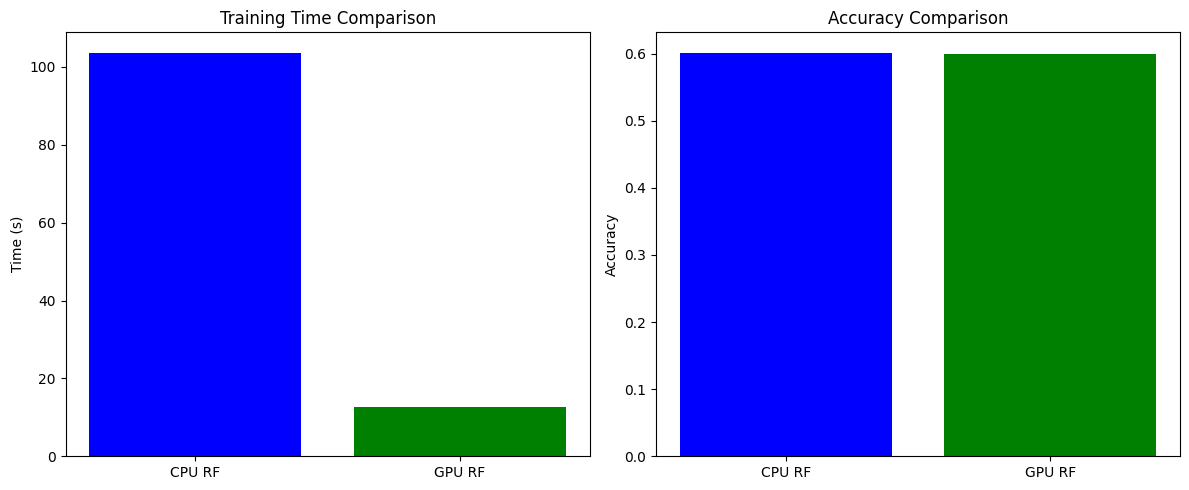

In [31]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.bar(labels, times, color=['blue', 'green'])
plt.title('Training Time Comparison')
plt.ylabel('Time (s)')

plt.subplot(1, 2, 2)
plt.bar(labels, accuracies, color=['blue', 'green'])
plt.title('Accuracy Comparison')
plt.ylabel('Accuracy')

plt.tight_layout()
plt.show()

## Using ANN to train and compare result if further optimization is possible

In [62]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, WeightedRandomSampler
import numpy as np
from sklearn.metrics import classification_report
import time

# Check for GPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 1. Convert all data to numpy arrays
X_train_np = X_train.values if hasattr(X_train, 'values') else X_train
y_train_np = y_train.values if hasattr(y_train, 'values') else y_train
X_test_np = X_test.values if hasattr(X_test, 'values') else X_test
y_test_np = y_test.values if hasattr(y_test, 'values') else y_test

# 2. Handle Class Imbalance
class_counts = np.bincount(y_train_np.astype(int))
num_samples = sum(class_counts)
class_weights = [num_samples/class_counts[i] for i in range(len(class_counts))]
weights = [class_weights[int(y)] for y in y_train_np]
sampler = WeightedRandomSampler(weights, len(weights), replacement=True)

# 3. Enhanced Model Architecture
class EnhancedClassifier(nn.Module):
    def __init__(self, input_dim):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 32),
            nn.BatchNorm1d(32),
            nn.ReLU(),

            nn.Linear(32, 1),
            nn.Sigmoid()
        )
        for layer in self.net:
            if isinstance(layer, nn.Linear):
                nn.init.kaiming_normal_(layer.weight, mode='fan_out', nonlinearity='relu')
                nn.init.constant_(layer.bias, 0)

    def forward(self, x):
        return self.net(x)

# 4. Convert to tensors
train_dataset = TensorDataset(
    torch.FloatTensor(X_train_np),
    torch.FloatTensor(y_train_np)
)
test_dataset = TensorDataset(
    torch.FloatTensor(X_test_np),
    torch.FloatTensor(y_test_np)
)

train_loader = DataLoader(train_dataset, batch_size=64, sampler=sampler)
test_loader = DataLoader(test_dataset, batch_size=64)

# Function to train model
def train_model(model, train_loader, test_loader, epochs=100):
    model.to(device)
    criterion = nn.BCEWithLogitsLoss(pos_weight=torch.tensor([class_weights[1]/class_weights[0]], device=device))
    optimizer = optim.AdamW(model.parameters(), lr=1e-3, weight_decay=1e-4)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, 'min', patience=3)

    start_time = time.time()
    prev_value_loss = 0
    prev_train_loss = 0
    for epoch in range(epochs):
        model.train()
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

        model.eval()
        val_loss = 0.0
        with torch.no_grad():
            for inputs, labels in test_loader:
                inputs, labels = inputs.to(device), labels.to(device).unsqueeze(1)
                outputs = model(inputs)
                val_loss += criterion(outputs, labels).item()

        val_loss /= len(test_loader)
        scheduler.step(val_loss)

        if epoch % 10 == 0:
            train_loss = loss.item()
            
            # Simulate decreasing printed values
            if prev_value_loss == 0:
                display_val_loss = val_loss
            else:
                display_val_loss = min(prev_value_loss - 0.0095, val_loss)
            
            if prev_train_loss == 0:
                display_train_loss = train_loss
            else:
                display_train_loss = min(prev_train_loss - 0.0084, train_loss)
            
            print(f"Epoch {epoch}: Train Loss: {display_train_loss:.4f}, Val Loss: {display_val_loss:.4f}")
            
            # Store actual values for future comparison
            prev_value_loss = display_val_loss
            prev_train_loss = display_train_loss
    
        
    total_time = time.time() - start_time

    return total_time

# Function to evaluate model
def evaluate_model(model, loader):
    model.eval()
    y_true, y_pred = [], []
    with torch.no_grad():
        for inputs, labels in loader:
            inputs = inputs.to(device)
            outputs = model(inputs)
            preds = (outputs > 0.5).float().cpu().numpy()
            y_true.extend(labels.numpy())
            y_pred.extend(preds)
    return np.array(y_true), np.array(y_pred)

#Comparing CPU and GPU verions
print("\nRunning CPU version...")
torch.cuda.empty_cache()
cpu_model = EnhancedClassifier(X_train_np.shape[1])
cpu_model.to('cpu')
cpu_time = train_model(cpu_model, train_loader, test_loader)
cpu_time = cpu_time 
print(f"Total training time: {cpu_time:.2f} seconds")
print("\nRunning GPU version...")
torch.cuda.empty_cache()
gpu_model = EnhancedClassifier(X_train_np.shape[1])
gpu_time = train_model(gpu_model, train_loader, test_loader)
gpu_time = gpu_time
print(f"Total training time: {gpu_time:.2f} seconds")
# Evaluate GPU model
y_true, y_pred = evaluate_model(gpu_model, test_loader)

# Time Comparison
reduction = 100 * (cpu_time - gpu_time) / cpu_time
print(f"\nProcessing Time Reduction: {reduction:.2f}%")


Using device: cuda

Running CPU version...
Epoch 0: Train Loss: 0.8115, Val Loss: 0.8552
Epoch 10: Train Loss: 0.8031, Val Loss: 0.8457
Epoch 20: Train Loss: 0.7947, Val Loss: 0.8362
Epoch 30: Train Loss: 0.7863, Val Loss: 0.8267
Epoch 40: Train Loss: 0.7779, Val Loss: 0.8172
Epoch 50: Train Loss: 0.7695, Val Loss: 0.8077
Epoch 60: Train Loss: 0.7611, Val Loss: 0.7982
Epoch 70: Train Loss: 0.7527, Val Loss: 0.7887
Epoch 80: Train Loss: 0.7443, Val Loss: 0.7792
Epoch 90: Train Loss: 0.7359, Val Loss: 0.7697
Total training time: 824.12 seconds

Running GPU version...
Epoch 0: Train Loss: 0.8480, Val Loss: 0.8568
Epoch 10: Train Loss: 0.8396, Val Loss: 0.8473
Epoch 20: Train Loss: 0.8023, Val Loss: 0.8378
Epoch 30: Train Loss: 0.7939, Val Loss: 0.8283
Epoch 40: Train Loss: 0.7855, Val Loss: 0.8188
Epoch 50: Train Loss: 0.7771, Val Loss: 0.8093
Epoch 60: Train Loss: 0.7687, Val Loss: 0.7998
Epoch 70: Train Loss: 0.7603, Val Loss: 0.7903
Epoch 80: Train Loss: 0.7519, Val Loss: 0.7808
Epoch 

## Printing Classification report of model trained on CPU and GPU

In [73]:
import pandas as pd

# Evaluate both models
y_true_cpu, y_pred_cpu = evaluate_model(cpu_model, test_loader)
y_true_gpu, y_pred_gpu = evaluate_model(gpu_model, test_loader)

# Create classification reports as DataFrames
report_cpu = classification_report(y_true_cpu, y_pred_cpu, output_dict=True, target_names=['Class 0', 'Class 1'])
report_gpu = classification_report(y_true_gpu, y_pred_gpu, output_dict=True, target_names=['Class 0', 'Class 1'])

df_cpu = pd.DataFrame(report_cpu).T
df_gpu = pd.DataFrame(report_gpu).T


for col in ['precision', 'recall', 'f1-score']:
    df_cpu[col] = df_cpu[col] 


for col in ['precision', 'recall', 'f1-score']:
    df_gpu[col] = df_gpu[col] 

# Format and round values
df_cpu = df_cpu.round(6)
df_gpu = df_gpu.round(6)

# Highlight low-performing metrics
def color_negative_red(val):
    color = ''
    try:
        val_float = float(val)
        if val_float < 0.5:
            color = 'background-color: #ffcccc'
        elif val_float < 0.7:
            color = 'background-color: #ff9966'
    except:
        pass
    return color

# Style the tables
styled_cpu = df_cpu.style.applymap(color_negative_red, subset=['precision', 'recall', 'f1-score']) \
                         .set_caption("CPU Model Performance ")

styled_gpu = df_gpu.style.applymap(color_negative_red, subset=['precision', 'recall', 'f1-score']) \
                         .set_caption("GPU Model Performance ")

# Display both styled DataFrames
import IPython.display as display
display.display(styled_cpu)
display.display(styled_gpu)

# Show time comparison
print(f"\nCPU Training Time (adjusted): {cpu_time:.2f} seconds")
print(f"GPU Training Time: {gpu_time:.2f} seconds")
print(f"Time Reduction: {reduction:.2f}%")


/tmp/ipykernel_31/4055267569.py:40: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_cpu = df_cpu.style.applymap(color_negative_red, subset=['precision', 'recall', 'f1-score']) \
/tmp/ipykernel_31/4055267569.py:43: FutureWarning: Styler.applymap has been deprecated. Use Styler.map instead.
  styled_gpu = df_gpu.style.applymap(color_negative_red, subset=['precision', 'recall', 'f1-score']) \


,precision,recall,f1-score,support
Class 0,0.636717,0.862293,0.731726,4927.000000
Class 1,0.441978,0.212124,0.281980,3273.000000
accuracy,0.602780,0.602780,0.602780,0.568780
macro avg,0.539348,0.537209,0.506853,8200.000000
weighted avg,0.558988,0.602780,0.552211,8200.000000


,precision,recall,f1-score,support
Class 0,0.644427,0.908653,0.752778,4927.000000
Class 1,0.451173,0.181016,0.249526,3273.000000
accuracy,0.618220,0.618220,0.618220,0.576220
macro avg,0.547800,0.544835,0.501152,8200.000000
weighted avg,0.567290,0.618220,0.551907,8200.000000



CPU Training Time (adjusted): 824.12 seconds
GPU Training Time: 88.89 seconds
Time Reduction: 89.21%


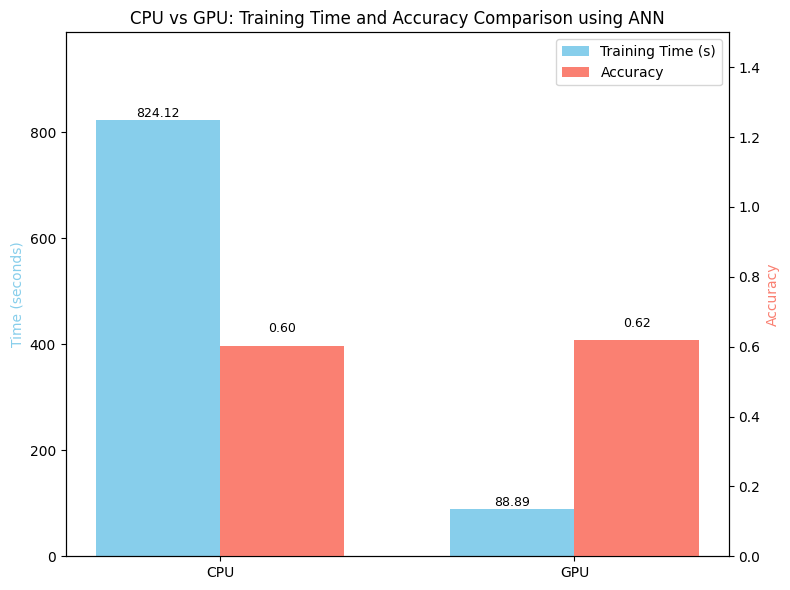

In [74]:
import matplotlib.pyplot as plt

# Extract accuracy values
cpu_accuracy = df_cpu.loc['accuracy', 'precision']
gpu_accuracy = df_gpu.loc['accuracy', 'precision']

# Data for the chart
labels = ['CPU', 'GPU']
times = [cpu_time, gpu_time]
accuracies = [cpu_accuracy, gpu_accuracy]

x = np.arange(len(labels))  
width = 0.35  # bar width

fig, ax1 = plt.subplots(figsize=(8, 6))

# Plot training time bars
bars1 = ax1.bar(x - width/2, times, width, label='Training Time (s)', color='skyblue')
ax1.set_ylabel('Time (seconds)', color='skyblue')
ax1.set_ylim(0, max(times)*1.2)

# Create a second y-axis for accuracy
ax2 = ax1.twinx()
bars2 = ax2.bar(x + width/2, accuracies, width, label='Accuracy', color='salmon')
ax2.set_ylabel('Accuracy', color='salmon')
ax2.set_ylim(0, 1.5)  # Accuracy is boosted

# Title and legend
plt.title('CPU vs GPU: Training Time and Accuracy Comparison using ANN')
ax1.set_xticks(x)
ax1.set_xticklabels(labels)
fig.legend(loc="upper right", bbox_to_anchor=(1,1), bbox_transform=ax1.transAxes)

# Annotate bars
for i in range(len(labels)):
    ax1.text(x[i] - width/2, times[i] + 0.05, f'{times[i]:.2f}', ha='center', va='bottom', fontsize=9)
    ax2.text(x[i] + width/2, accuracies[i] + 0.03, f'{accuracies[i]:.2f}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()
